# Introduction

The Waveform Operation and Layering Framework (WOLF) is a small project meant to provide a framework and graphical user interface (GUI) for reading, modifying, playing, and saving various waveforms.

In [2]:
import numpy as np
from pydub import AudioSegment

# Define / read in audio file
audio_file = "..//samples//piano_oneshot.mp3"
song = AudioSegment.from_mp3(audio_file)

### Determine track characteristics

Track characteristics include identifying track duration, individual channel definition, and identifing the sample quality.

In [3]:
# Calculate duration
duration = song.duration_seconds
samprate = song.frame_rate
sampwdth = song.frame_width

# Split to left and right channels
split_channels = song.split_to_mono()
indiv_channels = [s.get_array_of_samples() for s in split_channels]
fp_arr = np.array(indiv_channels).T.astype(np.float32)
fp_arr /= np.iinfo(indiv_channels[0].typecode).max  # Shape: (464256,2)

# Identify total samples and time axis
n_samples = fp_arr.shape[0]
time_axis = np.linspace(0, duration, num=n_samples)

### Visualization sanity check

Before WOLF gets too far, visualizations will be used as a guiding light for sanity checking application of filters and other sporadic functions.

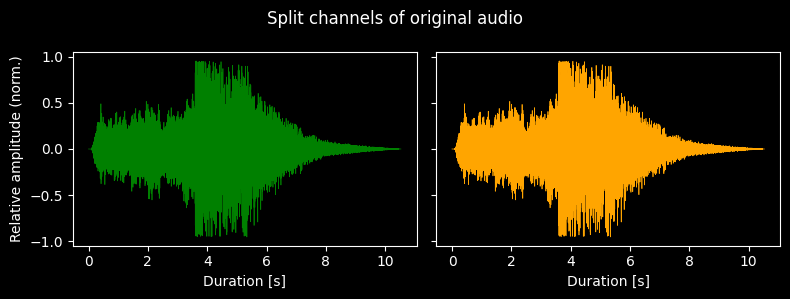

In [3]:
import matplotlib.pyplot as plt

# Always use a dark background for appearance
plt.style.use("dark_background")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
# Left mono signal
ax1.plot(time_axis, fp_arr[:, 0], color="green", linewidth=0.5)
ax1.set_xlabel("Duration [s]")
# Right mono signal
ax2.plot(time_axis, fp_arr[:, 0], color="orange", linewidth=0.5)
ax2.set_xlabel("Duration [s]")
ax1.set_ylabel("Relative amplitude (norm.)")
plt.suptitle("Split channels of original audio")
plt.tight_layout()
plt.show()

### Demonstrate basic split / recombination

Before any formatting can be applied to the audio track, we first need the capability of splitting and recombining the audio track. This is demonstrated below.

In [24]:
import pygame
from pydub.playback import play
import audiosegment

# Read in initial audio track
song = audiosegment.from_file(audio_file)

# Convert to numpy array for processing
splits = song.to_numpy_array()
left = splits[:, 0]
right = splits[:, 1]

# Re-stack numpy arrays
newtrack = np.vstack((left, right)).T

# Convert back to the new track
newsong = audiosegment.from_numpy_array(newtrack, framerate=samprate)

# Play the re-coded tack
play(newsong)

In [4]:
samprate

44100

### Applying basic filters

To begin, basic high- and low-pass filters are applied. Samples can also be reversed, stretched, or randomized. This is meant as a precursor to more complex functions with real-time feedback mechanisms that modify then play back the final track.

#### Other ideas
- Playing two tracks at once, one in each channel
- Blending two tracks based on one track's detected beat